In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


### Data preparation

#### Reading data

In [2]:
df = pd.read_csv('../data/emotions/emotions.csv')

In [3]:
df['category'] = df['category'].str.strip()

In [4]:
df.shape

(35887, 2307)

In [5]:
train = df.loc[df.category == 'Training',:]
valid = df.loc[df.category == 'PublicTest',:]
test  = df.loc[df.category == 'PrivateTest',:]

In [6]:
train.head(5)

,Unnamed: 0,y,0,1,2,3,4,5,6,7,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,category
0,0,0,70,80,82,72,58,58,60,63,...,182,183,136,106,116,95,106,109,82,Training
1,1,0,151,150,147,155,148,133,111,140,...,108,95,108,102,67,171,193,183,184,Training
2,2,2,231,212,156,164,174,138,161,173,...,138,152,122,114,101,97,88,110,152,Training
3,3,4,24,32,36,30,32,23,19,20,...,126,132,132,133,136,139,142,143,142,Training
4,4,6,4,0,0,0,0,0,0,0,...,34,31,31,31,27,31,30,29,30,Training


In [7]:
X_train = np.array(train.iloc[:, 2:2306])
y_train = np.array(train.loc[:, ['y']])

print(X_train.shape)
print(y_train.shape)

(28709, 2304)
(28709, 1)


In [8]:
X_val = np.array(valid.iloc[:, 2:2306])
y_val = np.array(valid.loc[:, ['y']])

print(X_val.shape)
print(y_val.shape)

(3589, 2304)
(3589, 1)


In [9]:
X_test = np.array(test.iloc[:, 2:2306])
y_test = np.array(test.loc[:, ['y']])

print(X_test.shape)
print(y_test.shape)

(3589, 2304)
(3589, 1)


#### Define mapping from labels to their names

In [10]:
mapping = {
    0: 'Angry', 
    1: 'Disgust', 
    2: 'Fear', 
    3: 'Happy', 
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'   
}

#### Display some random images

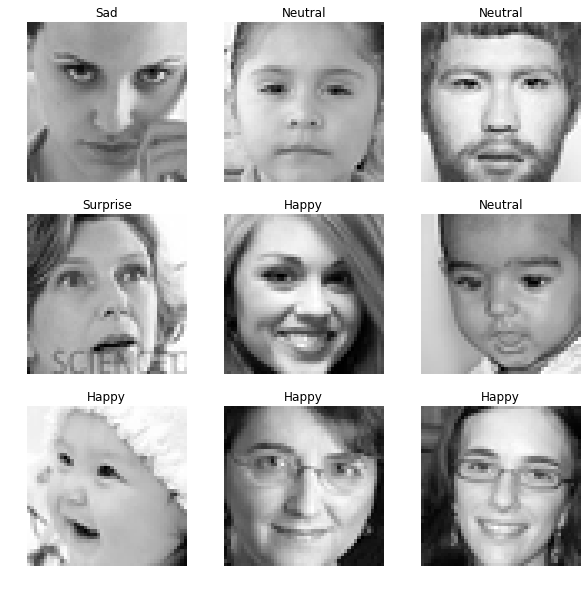

In [11]:
np.random.seed(1)

fig = plt.figure(figsize=(10, 10))

rows = 3
cols = 3

for i in range(1, rows * cols + 1):
    idx = np.random.randint(1, len(X_train))
    
    fig.add_subplot(rows, cols, i)
    plt.imshow(X_train[idx].reshape((48,48)), cmap = 'gray')
    plt.title(mapping[y_train[idx][0]])
    plt.axis('off')
plt.show()

In [12]:
y_train = keras.utils.to_categorical(y_train, 7)
y_train.shape

(28709, 7)

In [13]:
y_val = keras.utils.to_categorical(y_val, 7)
y_val.shape

(3589, 7)

In [14]:
y_test = keras.utils.to_categorical(y_test, 7)
y_test.shape

(3589, 7)

### Baseline CNN Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from keras.models import model_from_json

from keras.metrics import categorical_accuracy

np.random.seed(100)

#### Reshape samples

In [16]:
X_train_r = X_train.reshape((len(X_train), 48, 48, 1))
X_val_r   = X_val.reshape((len(X_val), 48, 48, 1))
X_test_r   = X_test.reshape((len(X_test), 48, 48, 1))

#### Normalize data

In [17]:
X_train_r = X_train_r / 255

In [18]:
X_val_r = X_val_r / 255

In [19]:
X_test_r = X_test_r / 255

#### Define the model

In [20]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

#### Data Augmentation

In [28]:
batch_size=32

In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img

gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator=gen.flow(x=X_train_r, 
                         y=y_train, 
                         batch_size=batch_size)

In [33]:
validation_generator=gen.flow(x=X_val_r, 
                         y=y_val, 
                         batch_size=batch_size)

#### Load weights of the pretrained model (since on laptop without GPU it takes nearly 8 hours to train it)

In [34]:
model.load_weights('../models/weights/complex_20_cc_2.h5')

In [ ]:
model.fit_generator(train_generator, 
                    steps_per_epoch=y_train.shape[0]/batch_size, 
                    epochs=3, 
                    validation_data=validation_generator, 
                    validation_steps=y_val.shape[0]/batch_size)

Epoch 1/3
 12/897 [..............................] - ETA: 22:36 - loss: 3.2268 - categorical_accuracy: 0.4115

In [182]:
#model.fit(X_train_r, y_train, batch_size=32, epochs=3, validation_data=(X_val_r, y_val))

Train on 28709 samples, validate on 3589 samples
Epoch 1/3
28709/28709 [==============================] - 1270s 44ms/step - loss: 0.2413 - categorical_accuracy: 0.9145 - val_loss: 1.7545 - val_categorical_accuracy: 0.6119
Epoch 2/3
28709/28709 [==============================] - 1156s 40ms/step - loss: 0.2483 - categorical_accuracy: 0.9121 - val_loss: 1.5555 - val_categorical_accuracy: 0.6152
Epoch 3/3
28709/28709 [==============================] - 1145s 40ms/step - loss: 0.2404 - categorical_accuracy: 0.9157 - val_loss: 1.4941 - val_categorical_accuracy: 0.6247


#### Code to save the trained model to disc

In [ ]:
model.save_weights('../models/weights/complex_20_cc_2.h5')

In [27]:
model_json = model.to_json()

In [196]:
with open("../models/model_deep.json", "w") as json_file:
    json_file.write(model_json)

#### Iteration

In [28]:
def read_model_from_disk(model: str, weights: str):
    
    json_file = open(model, 'r')
    
    loaded_model = json_file.read()
    
    model = model_from_json(loaded_model)
    
    model.load_weights(weights)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy])
    
    return model

In [29]:
model_saved = read_model_from_disk(model='../models/model_deep.json', weights='../models/weights/complex_20_cc_2.h5')

### Evaluations

In [30]:
model_saved.evaluate(X_test_r, y = y_test, verbose=1)

3589/3589 [==============================] - 35s 10ms/step


[1.4520415713708026, 0.632488158269658]

Our baseline model gave `63%` accuracy on test dataset. In the original competition leaderboard, it would be in top 10 submissions. We think, that it is absolutely possible to get even higher accuracy by training the model for larger number of epochs.

### Investigation

In [31]:
from sklearn.metrics import confusion_matrix

During the data analysis stage of our project we understood that the primary weakness of this dataset is its inbalanceness. We haven't tackled this issue yet (plan to do it in the next iteration), but we understood that dealing with it is a major part of this particular problem solution.

Let's take a look on the accuracy of prediction of separate classes of emotions.

In [43]:
y = pd.DataFrame(np.argmax(y_test, axis = 1), columns=['true'])

In [44]:
y['pred'] = model_saved.predict_classes(X_test_r)

In [45]:
y['true'] = y['true'].map(mapping)

In [46]:
y['pred'] = y['pred'].map(mapping)

In [47]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontdict = {'fontsize': 20})
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

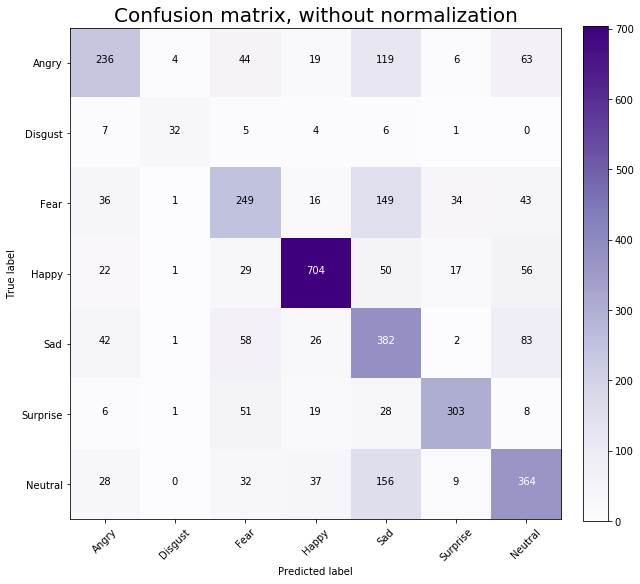

In [49]:
cnf_matrix = confusion_matrix(y['true'], y['pred'],
                              labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

np.set_printoptions(precision=2)


plt.figure(figsize=(9, 9))
plot_confusion_matrix(cnf_matrix, 
                      classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
                      title='Confusion matrix, without normalization', cmap = 'Purples')

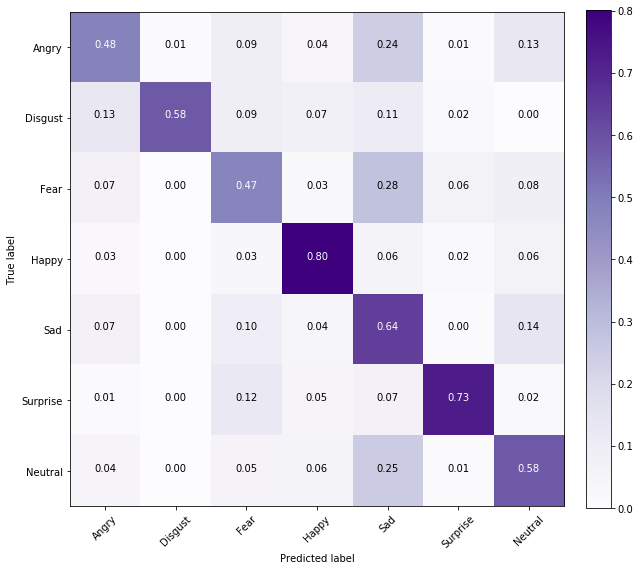

In [51]:
plt.figure(figsize=(9, 9))
plot_confusion_matrix(cnf_matrix, 
                      classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
                      normalize=True,
                      title='', cmap = 'Purples')
plt.savefig('../images/confusion.png')

Looks really funny, because we've got very unexpected results. `Disgust` emotion, while being extremely underepresented is our dataset is not the one that suffers most from misclassification.

It is `Angry` and `Fear`, that model most offen treats as other facial expression.

`Fear` ia mostly confused with `Sad`. Maybe because often when a person expreriences feat, it doesn't influence her facial expression and has impact only on some inner feelings. In general, when we are afraid of something, we can have different facial expression, depending on the situation, surrounding and the cause of fear. Fear is a complex emotion there is no single facial expression that corresponds to it.

From the confusion matrix we can conclude 3 out of 6 facial expression are often confused with `Sad`. It looks like this is the most obvious way to describe the expression if we are not sure what we see. 

One important thing should be noted here: our primary assumption that accuracy of classification of images will be smaller for underrepresented classes is not confirmed by the results produced by our model.

This fact proves once again that the problem of facial expression recognition is not as simple as it seems at first sight.